In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

In [3]:
df = pd.read_excel('sf_en_review25.xlsx')

In [4]:
df.head()

,タイトル,タイトルリンク,typography-hy,point,w-100,口コミ投稿日,text-center,report,report1
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,https://en-hyouban.com/company/10025403019/use...,働き方（勤務時間・休日休暇・制度）,4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日,2022年時点の情報,https://en-hyouban.com/inquiry/?kuchikomi_id=6...,https://en-hyouban.com/company/10025403019/kuc...
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,https://en-hyouban.com/company/10025403019/use...,働き方（勤務時間・休日休暇・制度）,4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年02月23日,2021年時点の情報,https://en-hyouban.com/inquiry/?kuchikomi_id=5...,https://en-hyouban.com/company/10025403019/kuc...
2,男性/ Solution Engineer/ 現職（回答時）/ 中途入社/ 在籍3～5年/ ...,https://en-hyouban.com/company/10025403019/use...,年収・給与,5.0,給与制度:提示される想定年収の8割が固定給で残り2割がインセンティブインセンティブは四半期ご...,2020年11月20日,2020年時点の情報,https://en-hyouban.com/inquiry/?kuchikomi_id=5...,https://en-hyouban.com/company/10025403019/kuc...
3,男性/ 6903/ 現職（回答時）/ 中途入社/ 在籍6～10年/ 正社員,https://en-hyouban.com/company/10025403019/use...,企業カルチャー・組織体制,4.9,企業カルチャー・社風:カスタマーサクセスを打ち出しており、導入後も運用をサポートする部門が支...,2021年04月 8日,2021年時点の情報,https://en-hyouban.com/inquiry/?kuchikomi_id=5...,https://en-hyouban.com/company/10025403019/kuc...
4,男性/ カスタマーサクセス/ 現職（回答時）/ 中途入社/ 在籍11～15年/ 正社員/ デ...,https://en-hyouban.com/company/10025403019/use...,福利厚生・オフィス環境,5.0,福利厚生:オフィス内のカフェテリアは充実している。エスプレッソマシンは自動であるが、豆もそれ...,2020年06月 2日,2020年時点の情報,https://en-hyouban.com/inquiry/?kuchikomi_id=5...,https://en-hyouban.com/company/10025403019/kuc...


In [5]:
df.columns

Index(['タイトル', 'タイトルリンク', 'typography-hy', 'point', 'w-100', '口コミ投稿日',
       'text-center', 'report', 'report1'],
      dtype='object')

In [9]:
df.drop(['タイトルリンク', '口コミ投稿日', 'report', 'report1'], axis = 1, inplace = True)

In [10]:
df.shape

(25, 5)

In [11]:
df.columns

Index(['タイトル', 'typography-hy', 'point', 'w-100', 'text-center'], dtype='object')

In [17]:
df.rename(columns = {'タイトル': 'reviewer_info', 
                     'typography-hy': 'title', 
                     'point' : 'rating', 
                     'w-100': 'review', 
                     'text-center': 'year'}, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_info  25 non-null     object 
 1   title          25 non-null     object 
 2   rating         25 non-null     float64
 3   review         25 non-null     object 
 4   year           25 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.1+ KB


<AxesSubplot:>

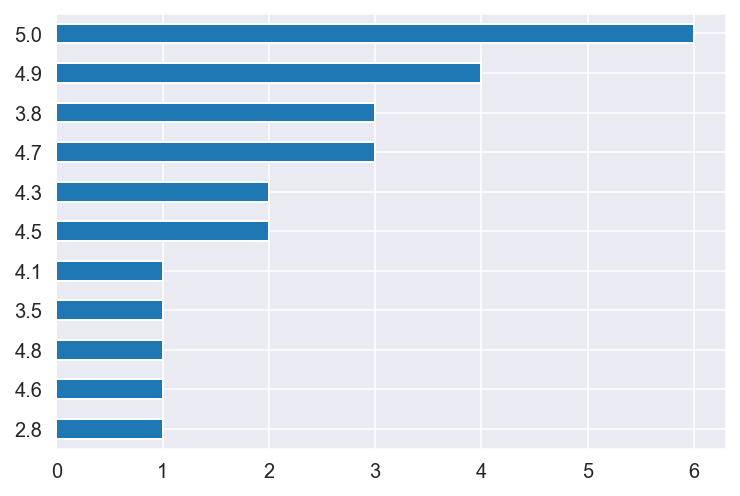

In [22]:
df['rating'].value_counts().sort_values().plot(kind = 'barh')

In [66]:
pip install murmurhash

Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install murmurhash3

  Preparing metadata (setup.py) ... done
  Created wheel for murmurhash3: filename=murmurhash3-2.3.5-cp38-cp38-macosx_10_9_x86_64.whl size=5293 sha256=4e38cca3f70353e4c72682c7060019f8460a035d9db32189697404cc9376f728
  Stored in directory: /Users/hitomihoshino/Library/Caches/pip/wheels/17/ef/5f/144ca0e42b7205633b07144e43c9fd7b3483b1cc21f4bc7778
Successfully built murmurhash3
Note: you may need to restart the kernel to use updated packages.


In [70]:
import spacy

# Languageクラス 変数名をnlpで宣言するのが一般的（spaCy推奨）
spacy.Language = spacy.load('ja_ginza')

ImportError: cannot import name 'hash_unicode' from 'murmurhash' (/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/murmurhash/__init__.py)

In [72]:
import sys


print("User Current Version:-", sys.version)


User Current Version:- 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
